# Ataque Tubarão
##### Limpeza e manuseio de dados

![](Shark.Attack.png)


![](shark.png)

#### Importando as bibliotecas

In [2]:
#Importando panda, regex, randon, numpy e os
#vou deixar comentado, para nao rodar de novo, nos erros de execução
import pandas as pd
import numpy as np
import re
import random
import os

## Importando o arquivo e Verificando os dados

In [5]:
#importanto o arquivo
df = pd.read_csv('attacks.csv', encoding='latin-1')

In [6]:
#verificando o "preenchimento" dos dados 
import seaborn as sms

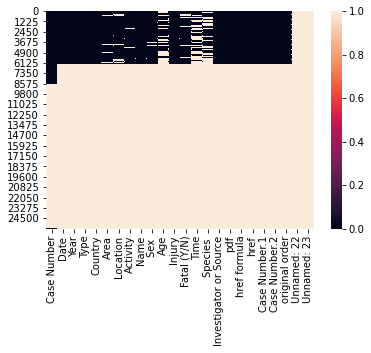

In [7]:
#conferindo os dados nulos visualmente
sms.heatmap(df.isna())

In [8]:
#verificando o tamanho do arquivo em linhas e colunas
df.shape

(25723, 24)

In [9]:
#Delimitando o Slice do nosso data Set conforme visual acimaoo de dados nulos
df= df[:6300]

In [10]:
#verificando o cabeçalho do arquivo
df.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN


In [11]:
#verificando o tamanho do arquivo em linhas e colunas, após definição do slice
df.shape

(6300, 24)

In [12]:
#verificando nome das colunas
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [13]:
#verificando tipo das colunas
df.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [14]:
#contando valores ausentes por coluna e colocando em %
df.isnull().sum()

Percent = (df.isnull().sum() / len(df['Case Number.1']))*100
print(Percent)

Case Number                0.015873
Date                       0.000000
Year                       0.031746
Type                       0.063492
Country                    0.793651
Area                       7.206349
Location                   8.571429
Activity                   8.619048
Name                       3.333333
Sex                        8.968254
Age                       44.920635
Injury                     0.444444
Fatal (Y/N)                8.555556
Time                      53.206349
Species                   45.015873
Investigator or Source     0.269841
pdf                        0.000000
href formula               0.015873
href                       0.000000
Case Number.1              0.000000
Case Number.2              0.000000
original order             0.000000
Unnamed: 22               99.984127
Unnamed: 23               99.968254
dtype: float64


### Verificando possiveis colunas duplicadas

In [15]:
#verifiquei 3 colunas "iguais", vou conferir se eh 100% iguais mesmo
df['Case Number'].equals(df['Case Number.1'].equals(df['Case Number.2'])) #False, pq nao sao 100% iguais

#depois do cod acima, vou verificar apenas com duas colunas
df['Case Number'].equals(df['Case Number.1']) #tbm deu falso, pq nao sao 100% iguais

#entao vou conferir qtos codigos de case number.1, contem dentro da outra coluna
df['Case Number.1'].isin(df['Case Number']).value_counts()

#verifiquei ao final, que apenas "23" itens são falso, logo, posso excluir duas delas e manter apenas o case number.1

True     6277
False      23
Name: Case Number.1, dtype: int64

In [16]:
#percebi que a coluna href e href formula parecem iguais. vou examinar com .equals
df['href formula'].equals(df['href'])

#entao vou conferir qtos codigos de href, contem dentro da outra coluna
df['href formula'].isin(df['href']).value_counts()

#verifiquei ao final, que apenas "59" itens são falso, logo, posso excluir duas delas e manter apenas 1. escolhi a href

True     6240
False      60
Name: href formula, dtype: int64

#### Corrigindo a coluna 'DATE'

Tentando trazer o mes a partir da coluna Case Number.1 (aparentemente é uma data)

In [17]:
#vou tentar "corrigir" algumas linhas da coluna data
#usando o Set para trazer uma amostra, e o sample para "pedir o tamanho da amostra"
print(set(df['Case Number.1'].sample(n=80)))

{'1856.11.25.R', '1907.10.12', '1947.07.24.R', '2012.10.16', '2001.08.19.c', '1993.00.00.a', 'ND-0152', '1888.01.22', '1917.07.15', '2005.07.15.R', '1955.02.04', '1973.03.00', '2016.08.07', '1871.00.00.b', '2005.03.27.R', '1983.12.21', '1962.04.09', '2018.03.14', '2003.07.20', '1878.09.02.b', '2001.09.13', 'ND.0056', 'ND.0083', '1993.08.21', '2015.04.11', '1967.08.00.a', '1984.02.11', '2002.01.01.b', '1974.05.26', '1996.10.09', '2014.08.10', '2000.08.30', '1998.11.05', '1970.01.10', '2009.06.16', '2005.05.02', '1951.06.25', '1637.00.00.R', '1913.08.26.R', '1903.01.10', '1975.10.04', '2017.05.03', '1962.02.05', '1927.12.28', '1966.02.27', '2002.08.28', '2002.12.16', '1929.07.29', '2007.08.09.b', '2017.08.23', '1861.02.12.R', '1985.05.08', '1939.07.18', '1840.02.00', '1887.10.18', '1955.11.16', '2009.09.13', '1942.06.00', '2015.08.29.a', '2017.04.26', '1920.01.24.R.b', '1963.00.00.b', '2016.06.11', '1960.00.00.a', '1961.05.17', '1931.08.06.R', '1909.01.00', '1998.05.16.b', '1960.06.27.a'

In [18]:
#tentando pegar o mês a parti da case number, com o slice de exemplo
df['Case Number'][0][5:7]

'06'

In [19]:
#função para encontrar o mes, a parti do slice da função, com tratamento para erro do mes a partir da coluna Case Number.1
def achar_mes(linha):
    '''Essa função servirá para rodar linha a linha e trazer o mes através do slice
    e tratar o erro caso o numero do  mes seja maior que 12, ou "0". '''
    try:
        mes = linha[5:7]
        mes = int(mes)
        if mes > 12 or mes == 0:
            mes = np.nan
    except:
        mes = linha
    return mes

In [20]:
#criando uma nova coluna com o mes 
df['Month'] = df['Case Number.1'].apply(achar_mes)

In [21]:
#contando a qutde de valores por mes
df['Month'].value_counts()

7.0     671
8.0     601
9.0     557
1.0     519
6.0     501
4.0     461
10.0    443
12.0    443
3.0     412
11.0    409
5.0     393
2.0     385
Name: Month, dtype: int64

In [22]:
#definindo o tipo de dado da coluna, para substituiiçao
df['Month'] = df['Month'].astype('str')

In [23]:
#converter numero para nome do mes, para utilizar no grafico.
df['Month'] = df['Month'].str.replace('1.0','Jan')
df['Month'] = df['Month'].str.replace('2.0','Fev')
df['Month'] = df['Month'].str.replace('3.0','Mar')
df['Month'] = df['Month'].str.replace('4.0','Abr')
df['Month'] = df['Month'].str.replace('5.0','Mai')
df['Month'] = df['Month'].str.replace('6.0','Jun')
df['Month'] = df['Month'].str.replace('7.0','Jul')
df['Month'] = df['Month'].str.replace('8.0','Ago')
df['Month'] = df['Month'].str.replace('9.0','Set')
df['Month'] = df['Month'].str.replace('10.0','Out')
df['Month'] = df['Month'].str.replace('11.0','Nov')
df['Month'] = df['Month'].str.replace('12.0','Dez')

In [24]:
#verificando após a troca dos meses como ficou
df['Month']

0       Jun
1       Jun
2       Jun
3       Jun
4       Jun
       ... 
6295    Jul
6296    Jun
6297    Mai
6298    Abr
6299    Mar
Name: Month, Length: 6300, dtype: object

In [25]:
#verificando a contagem dos meses
df['Month'].value_counts()

#observei que o mes de Novembro e Dezembro nao veio corretamente. Preciso fazer uma correção

Jul     671
Ago     601
Set     557
Jan     519
nan     505
Jun     501
Abr     461
Out     443
1Fev    443
Mar     412
1Jan    409
Mai     393
Fev     385
Name: Month, dtype: int64

In [26]:
#fazendo essa substituição
df['Month'] = df['Month'].str.replace('1Jan','Nov')
df['Month'] = df['Month'].str.replace('1Fev','Dez')

In [27]:
#conferindo se de fato houve a troca
df['Month'].value_counts()

Jul    671
Ago    601
Set    557
Jan    519
nan    505
Jun    501
Abr    461
Dez    443
Out    443
Mar    412
Nov    409
Mai    393
Fev    385
Name: Month, dtype: int64

In [ ]:
#ver no grafico qual mes teve + atack por pais
#see in graph which month has more attacks by country.

In [28]:
#verificando se houve realmente a troca
df.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Month
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN,Jun
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN,Jun


In [ ]:
#abaixo foram tentativas frustradas de tentar limpar a coluna de data.

In [ ]:
#CODIGO 1
'''A ideia, era criar uma lista vazia, para rodar o FOR dentro do dataset e com isso
    extrair os meses de dentro da coluna Data'''
'''mes = []
for linha in df['Date']:
    tempo_linha = ''.join(re.findall('\-[A-Za-z]{3}\-',linha)).lower()
    tempo_linha = re.sub('\-','',tempo_linha)
        
        
    if tempo_linha == '':
        temp_linha = np.nan

    mes.append(tempo_linha)

df['Month'] = mes'''

In [ ]:
#CODIGO 2
'''Nesse Segundo codigo a ideia era fazer um try|except para criar novas colunas extranindo os dados da Case Number.1
    mas nao consegui fazer uma extração de dados a parti dessa coluna,
    Eu acredito ter que alterar alguma parte do codigo no final, mas tentei varias vezes e nao consegui'''
'''try:
    df['Year1']=[y[0:4] for y in df['Case Number.1']] #vou extratir o ano, se o numero começar de 0 à 3
except:
    df['Year1']='00' #exceto se tiver 00
try:
    df['Month']=[m[5:7] for m in df['Case Number.1']] #vou extratir o mes, se o numero começar de 4 à 6
except:
    df['Month']='00' #exceto se tiver 00
try:
    df['Day']=[d[8:10] for d in df['Case Number.1']] #vou extratir o dia, se o numero começar de 7 à 10
except:
    df['Day']='00' #exceto se tiver 00
    
#agora vou fazer o loc, para verificar se contem caracteres nas colunas
df.loc[df['Year1'].str.contains('(?i)ND'),'Year1']='00'
df.loc[df['Year1'].str.contains('ND','.*'),'Day']='00'
df.loc[df['Year1'].str.contains('ND'),'Month']='00'

#agora vou substituir os nº decimal por "0" e converter a coluna em numero inteiro
#df['Year_'] = df['Year_'].replace(['0500.00.00','0077.00.00','0005.00.00','0000.0036', '0000.0493', '0000.0725'],0)
df['Year1'] = df['Year1'].replace(['0.02','0.03','0.04','0.07','""'],0)
df['Year1'] = df['Year1'].astype(int)

#por fim, vou colocar essas colunas novas que criei dentro do dataframe original
df = df[['Case number.1','Day','Month','Year1','Year','Date','Type','Country','Area','Activity',
           'Sex ','Age','Injury','Fatal (Y/N)','Species ','Investigator or Source','href']]

#aqui vou pegar uma amostra aleatória para conferir
df.head(100)'''

#### Corrigindo a coluna 'YEAR'

In [29]:
#verificando o typo de dado da coluna
type('Year')

str

In [30]:
#função para encontrar o ano, a parti do slice da função, para comparar com a coluna ano ja existente
def achar_ano(linha):
    '''Essa função servirá para rodar linha a linha e trazer o ano através do slice
    e trazendo apenas os anos que forem maior que 1800'''
    try:
        if 'ND' in linha:
            ano = np.nan
    except:
        ano = linha
    else:
        try:
            ano = linha[:4]
            ano = int(ano)
            if ano < 1800 or ano == 0:
                ano = np.nan
        except:
            ano = np.nan
    return ano

In [31]:
#verificando se ele encontra algum ano, como o exemplo abaixo
achar_ano('ND.0012')

nan

In [32]:
#criando uma nova coluna de ano para comparar com a coluna ja existente
df['Year1'] = df['Case Number.1'].apply(achar_ano)

In [33]:
#fazendo a contagem de "anos"
df['Year1'].value_counts()

2015.0    144
2017.0    137
2016.0    129
2011.0    128
2014.0    126
         ... 
1859.0      1
1807.0      1
1815.0      1
1806.0      1
1811.0      1
Name: Year1, Length: 209, dtype: int64

In [34]:
#verifinaco o tamanho de dados preenchidos da nova coluna ano 
print(len(df['Year1']))

6300


In [35]:
#Comparando as colunas de ano para verificar quantos dados ficaram "Vazios"
(df['Year']==df['Year1']).sum()

6124

In [36]:
#substituindo o tipo de dado da coluna para numero inteiro
df['Year'].astype('Int64')

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6295       0
6296       0
6297       0
6298       0
6299       0
Name: Year, Length: 6300, dtype: Int64

In [37]:
#encontrando a media dos anos
print(df['Year'].mean())
print(df['Year1'].mean())

1927.8844077484916
1968.7955323658894


In [38]:
#substituindo anos vazios pela media da coluna 'Year1'
df['Year1'].fillna(1968, inplace=True)

In [39]:
#verificando se houve a substituição dos nan, pela media
df['Year1']


0       2018.0
1       2018.0
2       2018.0
3       2018.0
4       2018.0
         ...  
6295    1968.0
6296    1968.0
6297    1968.0
6298    1968.0
6299    1968.0
Name: Year1, Length: 6300, dtype: float64

#### Corrigindo coluna 'TYPE'

In [40]:
#vamos ver os dados dessa coluna
set(df['Type'])

#podemos observar depois da execução que esta praticamente limpa..

{'Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked',
 nan}

In [41]:
#vou apenas substituir os errinhos

df['Type'] = df['Type'].str.strip()
df['Type'] = df['Type'].str.replace('Boating','Boat')
df['Type'] = df['Type'].str.replace('Boatomg','Boat')
df['Type'] = df['Type'].str.replace('Invalid','Desconhecido')
df['Type'] = df['Type'].str.replace('nan', 'Desconhecido')
df.loc[df['Type'].str.contains('nan', na=True), 'Type']='Desconhecido'

In [42]:
#vamos ver como ficou a coluna
print(set(df['Type']))

{'Desconhecido', 'Questionable', 'Unprovoked', 'Sea Disaster', 'Boat', 'Provoked'}


In [43]:
#Agora vou substituir os nomes de Ingles para Portgues
df['Type'] = df['Type'].str.replace('Sea Disaster','Desastre do Mar')
df['Type'] = df['Type'].str.replace('Provoked','Provocado')
df['Type'] = df['Type'].str.replace('Unprovoked', 'Não Provocado')
df['Type'] = df['Type'].str.replace('Questionable', 'Questionavel')
df['Type'] = df['Type'].str.replace('Boat', 'Barco')

In [44]:
#vamos ver como ficou a coluna com a tradução
print(set(df['Type']))

{'Desastre do Mar', 'Questionavel', 'Desconhecido', 'Não Provocado', 'Barco', 'Provocado'}


#### Corrigindo coluna 'COUNTRY'

In [45]:
#vamos ver como esta a coluna
print(set(df['Country']))

{nan, 'UNITED ARAB EMIRATES', 'GULF OF ADEN', 'CRETE', 'SOLOMON ISLANDS', 'EGYPT', 'NORTH ATLANTIC OCEAN', ' TONGA', 'NICARAGUA ', 'PARAGUAY', 'FALKLAND ISLANDS', 'FRENCH POLYNESIA', 'SOUTH CHINA SEA', 'ANDAMAN / NICOBAR ISLANDAS', 'URUGUAY', 'MARSHALL ISLANDS', 'ITALY / CROATIA', 'GUYANA', 'BAHAMAS', 'GUATEMALA', 'BURMA', 'Seychelles', 'CHINA', 'MALDIVE ISLANDS', 'ROATAN', 'MAURITIUS', 'Coast of AFRICA', 'EGYPT ', 'ANTIGUA', 'FIJI', 'MOZAMBIQUE', 'TUNISIA', 'NORTH SEA', 'ICELAND', 'NIGERIA', 'SENEGAL', 'REUNION ISLAND', ' PHILIPPINES', 'CAPE VERDE', 'NORTH PACIFIC OCEAN', 'ENGLAND', 'NICARAGUA', 'INDONESIA', 'TOBAGO', 'PERSIAN GULF', 'CUBA', 'SOMALIA', 'PHILIPPINES', 'GREENLAND', 'ATLANTIC OCEAN', 'SPAIN', 'BERMUDA', 'CYPRUS', 'Sierra Leone', 'AUSTRALIA', 'COSTA RICA', 'MALTA', 'BANGLADESH', 'CROATIA', 'SIERRA LEONE', 'BAHREIN', 'IRAN / IRAQ', 'SEYCHELLES', 'YEMEN ', 'UNITED KINGDOM', 'INDIAN OCEAN?', 'MAYOTTE', 'CURACAO', 'ARGENTINA', 'OKINAWA', 'TURKEY', 'MALDIVES', 'SOUTHWEST PACIF

In [46]:
#Essa coluna, parece estar bem limpa, apenas vou trocar os vazios por desconhecido e colocar em minuscula
df['Country'].fillna('DESCONHECIDO', inplace=True)
df['Country'] = df['Country'].str.strip().str.lower()

In [47]:
#vamos ver como ficou
print(set(df['Country']))

{'philippines', 'lebanon', 'red sea?', 'maldive islands', 'falkland islands', 'italy', 'andaman / nicobar islandas', 'st. martin', 'ghana', 'israel', 'persian gulf', 'tunisia', 'hong kong', 'syria', 'sudan?', 'algeria', 'mexico', 'atlantic ocean', 'kenya', 'mid atlantic ocean', 'monaco', 'palau', 'cayman islands', 'st helena, british overseas territory', 'croatia', 'papua new guinea', 'north pacific ocean', 'argentina', 'british isles', 'angola', 'reunion', 'north atlantic ocean', 'new zealand', 'french polynesia', 'norway', 'southwest pacific ocean', 'iceland', 'taiwan', 'new guinea', 'solomon islands', 'turkey', 'ocean', 'asia?', 'liberia', 'comoros', 'indian ocean?', 'solomon islands / vanuatu', 'canada', 'singapore', 'maldives', 'bay of bengal', 'djibouti', 'saudi arabia', 'malaysia', 'egypt / israel', 'the balkans', 'fiji', 'belize', 'palestinian territories', 'africa', 'iran', 'costa rica', 'antigua', 'gabon', 'bahrein', 'el salvador', 'northern mariana islands', 'cape verde', 's

#### Corrigindo a coluna 'ACTIVITY'

In [48]:
#vamos ver como esta a coluna
print(set(df['Activity']))

#entendo que a coluna atividade nao oferece muitas opções de "analise" alem de exigir uma grande limpeza de dados

{nan, 'Free diving, Spearfishing', 'Diving for trochus from lugger', 'Spearfishing with Joe Turner (24). Shark attracted to speared halibut on belt of one diver, tried to bite Ide\x92s speargun & he shot it in the mouth', 'Vehicle plunged over cliff into the water', 'Adrift on life raft', 'Washed into sea while picking opihi', 'Conch diver', 'Snorkeling, possibly holding a fish', 'Fishing', 'Diving / fishing', 'The 3540-ton Alfonso Penna was torpedoed & sunk by the Italian submarine Barbarigo', 'Scuba diving at seal colony', 'Attempting to rescue an injured & beached shark', 'Skimboarding', 'Swept out to sea while fishing', 'Dived into the water', 'Fishing, hooked shark towed boat out to sea, storm swamped boat', 'Swimming along a row of nets', 'Killing  sharks', 'Paddling outrigger canoe', 'Body found on deserted luxury yacht, 38\x92 Christine', 'Swimming', 'Diving alongsidethe steamship Ranelagh ', 'British ship Macedon was thrown on her beam ends by a sudden squall', 'Paddling', 'Ho

In [49]:
#verificando a qtde de ataques por atividade
df['Activity'].value_counts().head(20)

Surfing            971
Swimming           868
Fishing            431
Spearfishing       333
Bathing            162
Wading             149
Diving             127
Standing            99
Snorkeling          89
Scuba diving        76
Body boarding       61
Body surfing        49
Swimming            47
Kayaking            33
Fell overboard      32
Treading water      32
Pearl diving        32
Boogie boarding     29
Free diving         29
Windsurfing         19
Name: Activity, dtype: int64

In [50]:
#dessa forma vou apenas substituir os valores nulos por desconhecido
df['Activity'].fillna('Desconhecido', inplace=True)

#### Corrigindo a coluna "LOCATION"

In [51]:
#vamos ver como esta a coluna, pegando apenas uma amostra com o sample
print(set(df['Location'].sample(n=20)))

{nan, "Second Beach, Port St. John's", 'Havana Harbor', 'Ponce Inlet, Volusia County', 'Near Moreton Island in Moreton Bay', '750 miles off the African coast', 'Newcastle', 'Agulhas Banks', 'Key West Aquarium', 'Playas de Tijuana', 'Trieste', 'Mtunzini', 'Stono Inlet, near Charleston, Charleston County', 'Quy Nhon ', 'San Stefano', 'Stewart Island', 'Balian', 'Mzimvubu River mouth', 'Satellite  Beach, Brevard County', 'Daytona Beach, Volusia County'}


In [52]:
#verificando a qtde de ataque dos locais
df['Location'].value_counts()

New Smyrna Beach, Volusia County                   163
Daytona Beach, Volusia County                       30
Ponce Inlet, Volusia County                         20
Melbourne Beach, Brevard County                     18
Myrtle Beach, Horry County                          17
                                                  ... 
Lakewood Campground, Grand Strand, Horry County      1
Point Casuarina, Bunbury                             1
Copacabana Beach, Acapulco                           1
Yallingup                                            1
Alongside the whaler Marianne                        1
Name: Location, Length: 4106, dtype: int64

#### Corrigindo a coluna "AREA"

In [53]:
#vamos ver como esta a coluna
print(set(df['Area']))

{nan, 'Kuril Islands in the Pacific', 'Mersin Province', 'Transvaal', 'Bougainville (North Solomons)', 'San Blas coast', 'Taranto', 'Socotra Islands', '740 miles SE of Tarawa Atoll', 'Miyako Island', 'North Island', 'Eastern Catalona', 'Tongapatu Group', 'Lake Nicaragua (fresh water)', 'Corfu', 'Delta', 'Ascension Bay', ' Manila Bay', 'New Providence District', 'Yucatan Channel', ' Lau Province', 'Muala', 'Attica', 'Saint-Benoit', 'Genoa Province', 'Maine', 'Golfo de Venezia', 'Taitung ', 'Upolu Island', 'Mirs Bay ', 'Barlavento Islands', 'Saint-Gilles-les-Bains', 'Ehime Prefecture', 'Bora Bora', 'Port Louis Province', 'Reggio Calabria Province', 'Gulf of Lyons', 'Saint-Pierre', "South Ch'ungch'ong Province", ' La Libertad', 'Tamaulipas', 'St. Anne', 'New Jersey', 'CUBA', ' Split-Dalmatia Count,', 'Casamance', 'Coast Province', 'North Devon', 'Galica', 'Buenos Aires Province', 'Southern Province', 'Midway Atoll', 'Gulf of Panama', 'Moala Island', 'Southern District', 'Saint-Andre', 'Ge

In [54]:
#verificando a qtde de ataque por Area
df['Area'].value_counts().head(20)

Florida                  1037
New South Wales           486
Queensland                311
Hawaii                    298
California                290
KwaZulu-Natal             213
Western Cape Province     195
Western Australia         189
Eastern Cape Province     160
South Carolina            160
South Australia           104
North Carolina            101
Victoria                   90
Pernambuco                 74
Texas                      73
Torres Strait              70
North Island               67
New Jersey                 52
Tasmania                   41
South Island               40
Name: Area, dtype: int64

#### Corrigindo coluna "SEXO"  com espaço na coluna

In [55]:
#na verificação do cabeçalho, encontrei espaço no nome da coluna, vou oajustar :-)
df.rename(columns={'Sex ': 'Sex'}, inplace=True)
df.columns = df.columns.str.strip()

In [56]:
#Verificando os dados da coluna
set(df['Sex'])

{'.', 'F', 'M', 'M ', 'N', 'lli', nan}

In [57]:
#ainda tem erros.. Veja acima: '.', 'M', lli' e etc..
df['Sex'] = df['Sex'].str.replace('N', 'M')
df['Sex'] = df['Sex'].str.strip()
df['Sex'] = df['Sex'].fillna('Desconhecido')
df['Sex'] = df['Sex'].str.replace('lli', 'Desconhecido')
df['Sex'] = df['Sex'].str.replace('.', 'Desconhecido')

In [58]:
#novamente vamos ver como esta
set(df['Sex'])

{'Desconhecido', 'F', 'M'}

#### Corrigindo a coluna 'AGE'

In [59]:
#Verificando os dados da coluna
print(set(df['Age']))

{nan, '14', '73', 'mid-30s', '1', "60's", '16 to 18', '29', '12 or 13', '6', '86', '  ', '74 ', '7', '23 & 26', '50 & 30', 'Teen', '30s', '56', '45 ', '21', '46 & 34', '33 & 26', '18 or 20', '20?', '9', '50', '12', '34 & 19', '9 months', '5', '21 & ?', '13 or 18', '38', '13 or 14', '42', 'X', '22', '32 & 30', '27', '? & 19', '17 & 35', '41', '61', '47', '77', '33', '39', '18 to 22', '>50', '58', '3', '30 or 36', '28', '64', '40s', '51', ' 28', '20s', '7 or 8', '21 or 26', '18 months', '60', '28, 23 & 30', 'Ca. 33', '53', '33 or 37', '32', '23 & 20', '23', '"young"', '71', '57', '49', '63', '36', '7      &    31', '66', '11', '30', '59', '74', '2½', '44', '35', '36 & 26', '20', '43', '17 & 16', '30 & 32', '78', '62', '33 & 37', '9 & 12', '40', 'adult', '72', '31', 'mid-20s', '60s', '36 & 23', 'A.M.', 'young', '8', ' ', '68', '84', ' 43', '45', '\xa0 ', '37, 67, 35, 27,  ? & 27', '87', '28 & 26', '20 ', 'Teens', '17', '13', '21, 34,24 & 35', 'Both 11', '25 to 35', '67', '50s', '69', '6½'

In [60]:
#armazenando os erros de idades em variravel e trocando para preenhcer coluna
'''lista_idade= [[['30 & 32']=30],['7 or 8']=7],['9 or 10']=9],
'21 & ?', '? & 19','28, 23 & 30','23 & 26', '37, 67, 35, 27,? & 27','9 or 10','32 & 30','13 or 14','18 to 22'
              ,'?    &   14',  '6½', '25 or 28', '24 & 35', '7      &    31', '34 & 19', '40s','30 or 36', '12 or 13',
              '50s', '23 & 20', '33 & 37', '30s','36 & 26','10 or 12' ,'30 & 32', '17 & 35', "60's",'18 or 20', '17 & 16',
              '25 to 35','36 & 23' , '28 & 26', '16 to 18', '33 & 26', '7 or 8', '9 & 12','31 or 33', '2½', '21 or 26'
             ,'13 or 18', '46 & 34','33 or 37', '20s',  '8 or 10', '60s','50 & 30','20?', '>50']'''

'''Lista_sem_m = ['"middle-age"','mid-30s','X', 'A.M.','9 months',  '2 to 3 months', 'adult', 'nan', 'Elderly','Both 11',
               '(adult)','teen', 'Teens','Tenn','F', '"young"','18 months', 'mid-20s' , '\xa0 ','MAKE LINE GREEN',
               'Ca. 33', ' ', '  ']'''

#verifiquei que nao faz sentido fazer essa "limpeza", pois nao tem como "adivinhar" os valores de texto
#porem vou manter a coluna no Dataset

'Lista_sem_m = [\'"middle-age"\',\'mid-30s\',\'X\', \'A.M.\',\'9 months\',  \'2 to 3 months\', \'adult\', \'nan\', \'Elderly\',\'Both 11\',\n               \'(adult)\',\'teen\', \'Teens\',\'Tenn\',\'F\', \'"young"\',\'18 months\', \'mid-20s\' , \'\xa0 \',\'MAKE LINE GREEN\',\n               \'Ca. 33\', \' \', \'  \']'

#### Corrigindo coluna 'FATAL'

In [61]:
#vou examinar a coluna "Fatal", e os dados dela,  ela pode indicar quantos foram fatais
set(df['Fatal (Y/N)'])

{' N', '2017', 'M', 'N', 'N ', 'UNKNOWN', 'Y', nan, 'y'}

In [62]:
#vou "substituir" os valores "inuteis da coluna FATAL, mas vou manter o unckonw como "U".
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.strip()
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].fillna('Desconhecido')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace(' N', 'Não')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('N', 'Não')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('N ', 'Não')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('2017', 'Desconhecido')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('M', 'Não')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('y', 'Sim')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('Y', 'Sim')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('UNKNOWN', 'Desconhecido')
df.rename(columns={'Fatal (Y/N)': 'Fatal (Y/N/U)'}, inplace=True)
print(set(df['Fatal (Y/N/U)']))

{'Desconhecido', 'Sim', 'UNãoKNãoOWNão', 'Não'}


In [63]:
#Aqui verifiquei que ele tbm trocou o N da palavra "unknown" por erros, agora vou subsituuir apenas esses erros
df['Fatal (Y/N/U)'] = df['Fatal (Y/N/U)'].str.replace('UNãoKNãoOWNão', 'Desconhecido')

In [64]:
#Vou agora conferir se aparece apenas 3 itens na coluna
set(df['Fatal (Y/N/U)'])

{'Desconhecido', 'Não', 'Sim'}

#### Corrigindo a coluna 'SPECIES'

In [65]:
#vamos ver como esta a coluna, pegando apenas uma amostra com o sample
print(set(df['Species'].sample(n=20)))

{nan, "Tiger shark, 10'  ", 'White shark?', 'Shark involvement not confirmed', '"A small shark"', 'Invalid', 'White shark, 2m ', ' Raggedtooth shark, 2m'}


In [66]:
#vamos ver como esta a coluna
print(set(df['Species']))

{nan, "2.1 m  [7'] bull shark", "Spinner shark, 5'", 'White shark, 3m', ' White shark', "5 m to 6 m [16.5' to 20'] white shark", "+3' shark", "14' to 16' white shark", 'Sandbar shark', "4.5 m to 5.5 m [15' to 18'] white shark", "Lemon shark, 4'", 'Oceanic whitetip sharks were in the vicinity', "Bronze whaler shark, 2 m to 3 m [6.75' to 10']  ", "Tiger shark, 2.1 m [7']", "His hand was found in a 2.4 m [8'] tiger shark caught 1/5/1949", 'nurse shark', "60 cm to 90 cm [2' to 3'] shark", 'Nurse shark, 58", 34-lb ', 'Nurse shark?', "Nurse shark. 5'", 'Galapagos shark', 'Said to involve a large mako shark', "4.3 m [14'] shark seen in area previous week", 'Bull shark, 1.4m ', 'Starry smoothhound shark, 1m', '4.3 m shark', 'Sandtiger shark', "1.8 m to 2.1 m [6' to 7'] shark", "6' to 8' bull shark", '"The fish was harpooned, dried, and presented to the sailor, who went round Europe exhibiting it  It was said to be 20 feet long.', 'a small reef shark', "Nurse shark, 0.9 m [3'] ", 'Reported to i

In [67]:
#verificando a qtde de ataques por atividade
df['Species'].value_counts().head(20)

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
Shark involvement prior to death unconfirmed           68
Bull shark                                             52
6' shark                                               40
4' shark                                               40
1.8 m [6'] shark                                       35
Questionable incident                                  35
Questionable                                           34
1.5 m [5'] shark                                       32
1.2 m [4'] shark                                       27
5' shark                                               26
3' shark                                               26
2 m shark                                              25
4' to 5' shark

In [68]:
#Nao acredito ser interessante mostrar a especie do ataque, pois poucas linhas informan de fato a specie
#além de exigir grande limpeza e para nao exclui-la, vou apenas substituir os vazios por "desconhecido"
df['Species'].fillna('Desconhecido', inplace=True)

In [ ]:
#conforme visual acima, ainda temos "oportunidade" nas colunas 

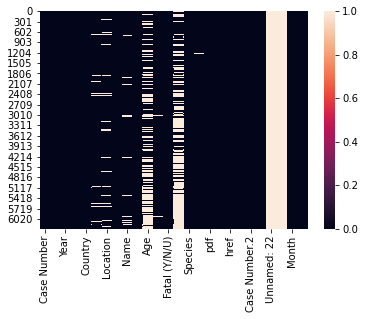

In [69]:
#agora vamos ver como esta os dados após essas limpezas
sms.heatmap(df[:].isna())

#### Dropando colunas "INUTEIS"

In [70]:
#agora vou dropar as colunas que "entendo" nao ser uteis
df = df.drop(["Case Number",'Name','Time','pdf','href formula','Year',
              "Case Number.2","Unnamed: 22", "Unnamed: 23"], axis=1)

In [71]:
#verificando o dataset
df.head(2)

,Date,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N/U),Species,Investigator or Source,href,Case Number.1,original order,Month,Year1
0,25-Jun-2018,Barco,usa,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",Não,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,6303.0,Jun,2018.0
1,18-Jun-2018,Não Provocado,usa,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,Não,Desconhecido,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,6302.0,Jun,2018.0


In [72]:
#Verificando agora o tamanho do dataset, com as exclusão de linhas com valores nulos
df.shape

(6300, 17)

## Verificando novamente arquivo
Fazendo um double check

In [73]:
#verificando o tamanho do arquivo em linhas e colunas
print(df.shape)

#verificando as info
print(df.info())

(6300, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6300 non-null   object 
 1   Type                    6300 non-null   object 
 2   Country                 6300 non-null   object 
 3   Area                    5846 non-null   object 
 4   Location                5760 non-null   object 
 5   Activity                6300 non-null   object 
 6   Sex                     6300 non-null   object 
 7   Age                     3470 non-null   object 
 8   Injury                  6272 non-null   object 
 9   Fatal (Y/N/U)           6300 non-null   object 
 10  Species                 6300 non-null   object 
 11  Investigator or Source  6283 non-null   object 
 12  href                    6300 non-null   object 
 13  Case Number.1           6300 non-null   object 
 14  original order          6300 

## Finalizando a limpeza

In [74]:
#agora estou chegando no final.. Vamos ver como esta o data set
df.head(4)

,Date,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N/U),Species,Investigator or Source,href,Case Number.1,original order,Month,Year1
0,25-Jun-2018,Barco,usa,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",Não,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,6303.0,Jun,2018.0
1,18-Jun-2018,Não Provocado,usa,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,Não,Desconhecido,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,6302.0,Jun,2018.0
2,09-Jun-2018,Desconhecido,usa,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,Não,Desconhecido,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,6301.0,Jun,2018.0
3,08-Jun-2018,Não Provocado,australia,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,Não,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,6300.0,Jun,2018.0


In [75]:
#verificando tamanho do dataset
df.shape

(6300, 17)

In [76]:
#Eliminando linhas inuteis que contenham valores nulos
#df = df.dropna()

### Vamos reordenar as colunas

In [77]:
#verificando como esta as colunas
df.columns

Index(['Date', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Sex', 'Age',
       'Injury', 'Fatal (Y/N/U)', 'Species', 'Investigator or Source', 'href',
       'Case Number.1', 'original order', 'Month', 'Year1'],
      dtype='object')

In [78]:
#preciso renomear a coluna Year
df.rename(columns={'Year1': 'Year'}, inplace=True)
df.columns = df.columns.str.strip()

In [79]:
#Agora vamos reordenar as colunas na ordem que quisermos.
df = df[['original order','Case Number.1','Date','Month','Year','Type','Country',
         'Area','Location','Activity','Sex','Age','Fatal (Y/N/U)','Species','Injury',
         'Investigator or Source','href']]

In [80]:
df.head(2)

,original order,Case Number.1,Date,Month,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N/U),Species,Injury,Investigator or Source,href
0,6303.0,2018.06.25,25-Jun-2018,Jun,2018.0,Barco,usa,California,"Oceanside, San Diego County",Paddling,F,57,Não,White shark,"No injury to occupant, outrigger canoe and pad...","R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
1,6302.0,2018.06.18,18-Jun-2018,Jun,2018.0,Não Provocado,usa,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Não,Desconhecido,Minor injury to left thigh,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...


# Exportando o DataFrame para um arquivo novo

In [81]:
df.to_csv('attacks_clean3_vs_final.csv', index=False)

### Visualizando o novo DataSet

In [82]:
df = pd.read_csv('attacks_clean3_vs_final.csv', encoding='UTF-8')

In [83]:
df.head(2)

,original order,Case Number.1,Date,Month,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N/U),Species,Injury,Investigator or Source,href
0,6303.0,2018.06.25,25-Jun-2018,Jun,2018.0,Barco,usa,California,"Oceanside, San Diego County",Paddling,F,57,Não,White shark,"No injury to occupant, outrigger canoe and pad...","R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
1,6302.0,2018.06.18,18-Jun-2018,Jun,2018.0,Não Provocado,usa,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Não,Desconhecido,Minor injury to left thigh,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...


In [84]:
#verificando o tamanho do arquivo em linhas e colunas
df.shape

(6300, 17)

In [85]:
#verificando os tipo de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   original order          6300 non-null   float64
 1   Case Number.1           6300 non-null   object 
 2   Date                    6300 non-null   object 
 3   Month                   5795 non-null   object 
 4   Year                    6300 non-null   float64
 5   Type                    6300 non-null   object 
 6   Country                 6300 non-null   object 
 7   Area                    5846 non-null   object 
 8   Location                5760 non-null   object 
 9   Activity                6300 non-null   object 
 10  Sex                     6300 non-null   object 
 11  Age                     3470 non-null   object 
 12  Fatal (Y/N/U)           6300 non-null   object 
 13  Species                 6300 non-null   object 
 14  Injury                  6272 non-null   

# ELABORANDO PERGUNTA DE NEGOCIOS
##### Vou buscar elaborar algumas perguntas com respostas a partir dessa limpeza de dados

#### Importando as bibliotecas

In [86]:
#vou importar a biblioteca para fazer os graficos
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
#Criando a variavel de ataque por ano, dos que aconteceram após 1990
df['Year_2'] = df[df['Year']>1990]['Year']
Years_v = df['Year_2'].value_counts().sort_index()

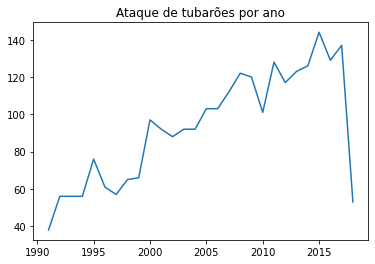

In [88]:
#Qual foi a quantidade de ataque por ano | após o ataque
%matplotlib inline
Years_v.plot(title="Ataque de tubarões por ano")

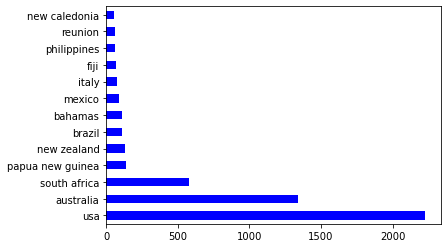

In [89]:
#Qual foi a quantidade de ataques por paises, com valores acima de 50.
df.groupby('Country')\
  .filter(lambda x: len(x) > 50)\
  .Country.value_counts()\
  .plot.barh(color='Blue')

In [ ]:
#Qual foi a proporção de idade por ataque

'''df['Age_Limpa'] = df['Age'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
age_v = df['Age_Limpa'].value_counts().sort_index()
age_v.plot(style=".",title = "Idade das vitimas")'''

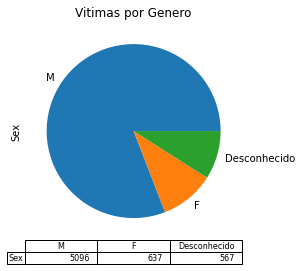

In [90]:
#Qual foi a proporção de genero por ataques?
df[df['Sex'].isin(['M','F','Desconhecido'])]['Sex']\
        .value_counts()\
        .plot(kind='pie',title= "Vitimas por Genero",table= True)

#comentario abaixo para poder mudar a cor, basta colocar o comentario da cor, depois do titulo, antes do table.
#colors= ['yellow','black']

#Colocar o comentario da minha teoria .

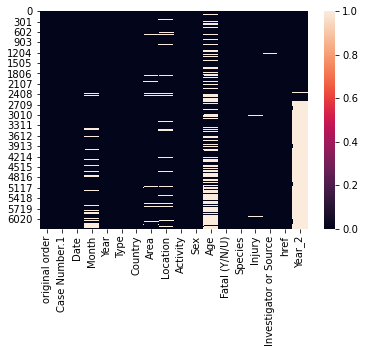

In [91]:
#agora vamos ver como esta os dados após essas limpezas
sms.heatmap(df[:].isna())

# Essa foi dificil hein kk!! Gastei mais de 3 dias pra conseguir chegar nessa versão :-( , e ainda nem sei se conseguir "limpar" bem o arquivo.
Aguardo feedback!